# Linear Regression

At a fundamental level Neural Network architectures are based on the principles of linear and logistic regression. We therefore begin with a review of these topics with some worked examples.

These notes provide a relatively detailed review of Linear Regression. The notes are based on a number of courses and in particular Andrew Ng's Machine Learning course on Youtube. The first video in that series can be found here:

https://www.youtube.com/watch?v=kHwlB_j7Hkc

This material will often be covered in a Machine Learning course and as a result there is overlap here with modules you may have taken or may be taking currently. This is a necessary evil; this stuff is important, so it is worth understanding it from a couple of different directions! In our case, it is worth keeping in mind that Regression and some of its important concepts, like loss functions, training, and regularisation, are all building blocks of neural networks. Therefore it is good to see how these concepts work before we get bogged down in all the neural network details. 

## Introduction

To begin let's start by defining a couple of key concepts and looking at examples of them. 

### Definition: Target
We define the Target as the output feature in our model. The Target feature is referred to as the *Dependent Variable* in statistics derived literature. When modeling we typically denote the target feature with the symbol $Y$. When programming we may sometimes instantiate the variable with a more descriptive name. In Linear Regression the Target Variable is an instance of a Real Number, not an Integer, and definately not a binary variable or class. 

### Example
In a typical linear regression example we might be interested in modeling the relationship between height and age. In this case our Target feature or dependent variable is *height*. 

Assuming measurements in meters we can instantiate a vector of height measurements in numpy using the 'array' function where the resultant array is equivalent to a vector. Remember that the numpy array is actually initialized from a native python array. 

In [8]:
import numpy as np
Y = np.array([60,90,100.5,130,128,140,160,140,165,162,155])
print("Our height vector is ", Y)

Our height vector is  [ 60.   90.  100.5 130.  128.  140.  160.  140.  165.  162.  155. ]


As an aside, familiarise yourself with Numpy if you are not already familiar with it. Numpy is a library for manipulating vectors and is used extensively in many different scientified computing applications in Python. 

### Definition: Predictor Features
The Predictor Features are the input features to our model and are referred to as *Independent Variables* in the statistics literature. A nice way of remembering this is that we ideally want *independent features*. The predictor features are usually denoted with the symbol $X$. A single $X$ is used in the case where there is only one predictor feature (usually only in toy examples) while $X$ is indexed ($X_{1}$) where there is more than one predictor feature. 

In our height modeling example we might start out with the case of a single Predictor Feature *age*: 

In [9]:
X = np.array([1,3,4,7,10,11,14,13.5,16,18,22])
print("Our age vector is ", X)

Our age vector is  [ 1.   3.   4.   7.  10.  11.  14.  13.5 16.  18.  22. ]


In most cases that we start with, the Independent Variable / Features are generally Real Valued but the conditions are not as strict as with the Dependent Variable. We can have binary values as the Independent Variable but for most of our cases we will stick with real valued inputs. 

### Note - Terminology 
By convention we usually refer to the Target feature as the **Target** and the Predictor Features as simply the **Features**. 

### Example: Height as a Function of Age
We can visualize our Height and Age data as follows:


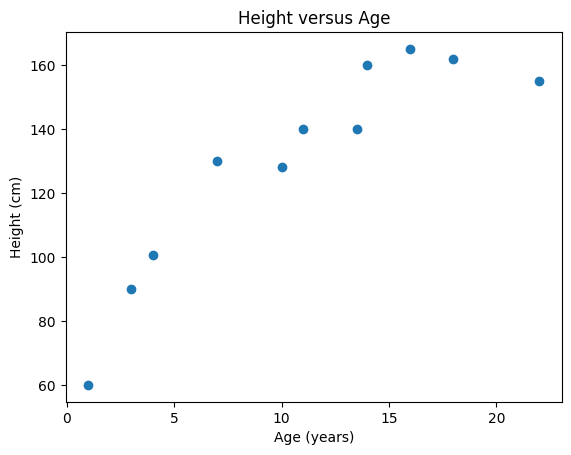

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

Examining our data we can clearly see a relationship between Age and Height but how do we model the relationship between the two variables? We could start with correlation: 

In [11]:
from scipy.stats import pearsonr
r,p = pearsonr(X,Y)
print('r value is ',r)
print('p value is',p)

r value is  0.9028496585155188
p value is 0.00014105270724641005


Correlation confirm that there is a strong positive relationship between the two variables, but this is useless if we want to be able to predict a value for our Target (*Height*) based on a new value for our Feature (*Age*). For example lets say that we want to know the most likely value for *Height* based on an *Age* of 9. We can do this intuitively by looking at our plot and estimating what value on the Y axis corresponds to 9 on the X axis. 

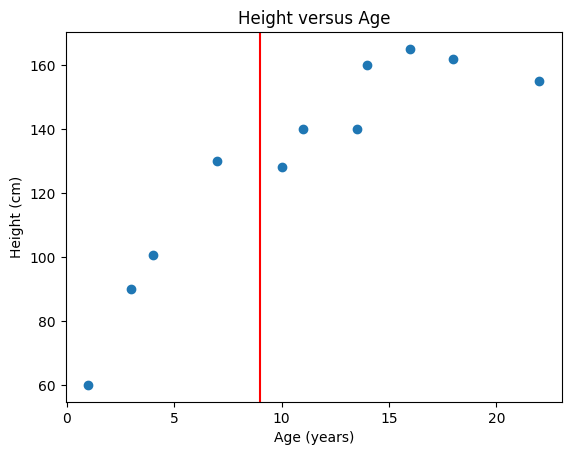

In [12]:
plt.axvline(9, color='red')
plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

Rather than having to do this manually, linear regression gives us a way to estimate this by fitting a function to our data that allows us to predict a likely value for our Target based on a choice of input features. 

### Definition: Linear Regression 
Linear Regression is an approach to modeling the relationship between a Target and Features with a parameterised function. 

The most basic function we can fit to our example is a straight line of the form:

\begin{equation}
 Y = mX + c
\end{equation}

where $m$ defines the slope of the line and $c$ defines the line's offset from the origin. 

For this toy example we can look at the data and guess that a reasonable fit to the data might be

\begin{equation}
 Y = 4X + 80
\end{equation}

Generally though for linear regression we rewrite the equation above such that the intercept is placed before the slope term as follows:

\begin{equation}
 Y = 80 + 4X
\end{equation}

We can plot a graph of this line / function against our data as follows: 

[ 80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144 148
 152 156 160 164 168 172 176]


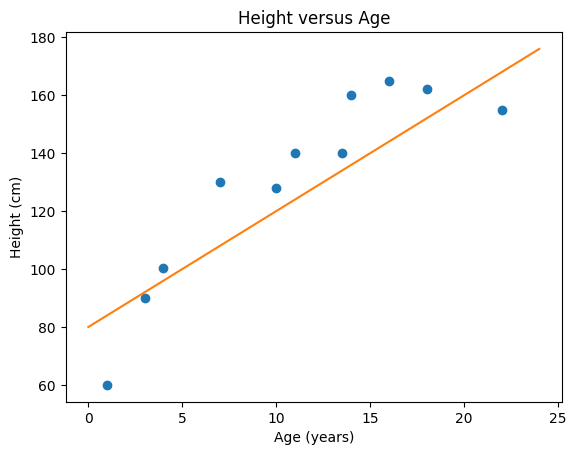

In [13]:
plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
x2 = np.array([i for i in range(25)])
y2 = 80 + 4*x2
print(y2)
plt.plot(x2,y2)
plt.show()

Alternatively we might think that the linear function $Y= 60 + 6X$ might give a better fit. 

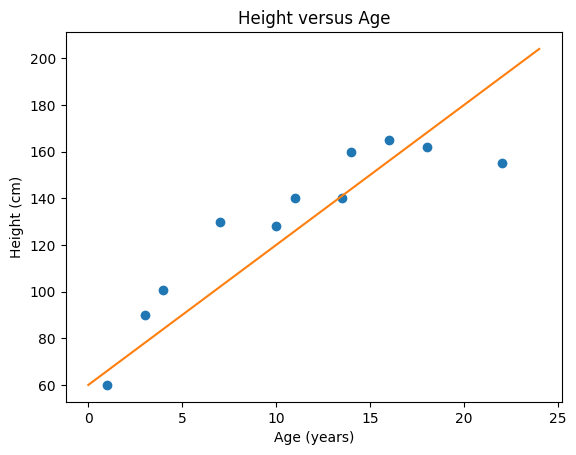

In [14]:
plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
x2 = np.array([i for i in range(25)])
y2 = 60 + 6*x2 
plt.plot(x2,y2)
plt.show()

We might even think that a polynomial such as 
\begin{equation}
Y = 50 + 15X - 0.68 X^{2} + 0.011 X^{3}
\end{equation}

would provide a better fit again.

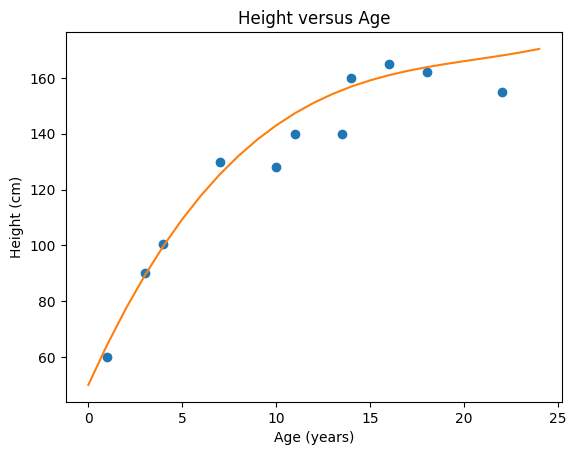

In [15]:
plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
x2 = np.array([i for i in range(25)])
y2 = 50 + 15*x2 - 0.68*(x2**2)  + 0.011*(x2**3)
plt.plot(x2,y2)
plt.show()

This is clearly the case, but for the moment we will stay focused on purely linear functions with no higher order terms. 

## Hypothesis Function

In linear regression we assume the function which best fits the data is a linear functions of x the form: 

\begin{equation}
h_{\theta}(x) = \theta_{0} + \theta_{1}x
\end{equation}

In the (textbook) literature this is referred to as our **hypothesis function** as it is the thing that we are trying to test out or evaluate. The hypothesis function is also often referred to as simply **the function** or **model**. In the notes below we will refer to it simply as our model.  

**$\theta$ are the parameters of the model**. In the examples above the parameters were selected by manually playing with the parameters until a reasonable fit was found. In linear regression we automate the selection of these parameters by minimizing a Cost Function. 

## Cost Functions

**Definition** The cost function, $J$, is a function which gives us a numeric estimate of the error between the predictions of our model and the test data values.

**Formal Definition**

\begin{equation}
J(\theta_{0},\theta_{1}) = \frac{1}{2m}     \sum_{i=0}^{m} ( h_{\theta}(x^{(i)}) - y^{(i)})^{2} 
\end{equation}

where 
 * $\theta_{0}$ and $\theta_{1}$ are the parameters of our model
 * $m$ is the number of training examples
 * $y^{i}$ is the ith target value
 * $x^{i}$ is the ith feature vector, and 
 * $h_{\theta}$ is our model (hypothesis function of $x$) that we wish to evaluate. 

**Intuition**

The intuition for the cost function is that it is measuring the difference between the ground truth values for our data and the predictions of our model. However rather than us adding up the differences we add up the square of the differences. This has two positive effects. First positive and negative difference values for different training examples won't cancel each other out. Secondly our model will heavily penalize cases where the predicted value is far away from the truth, but will only lightly penalize cases where there is a small difference between truth and prediction. This allows the search for the best fit to focus broadly on fixing up the big problems. 

The factor $\frac{1}{2m}$ is not technically needed for the cost function, but we introduce it as it allows us to use a very simple derivative of the cost function later when we use numerical optimization to search for the best set of parameters for our model.

This cost function is often referred to as the **Sum of Squared Error** cost function. 

**Example**
We can use this function to directly calculate the cost associated with our linear equation based estimates of the height and age data as shown below. 

In [16]:
def hyp(theta0,theta1,x):
    """This is our actual model function that combines parameters with an input feature (x)
        to return a value (which would be y)"""
    return theta0 + theta1*x

def J(theta0,theta1,x,y,h): 
    """This is the function that calculates our cost for a hypothesised function and a set
        of training data. """
    s = 0
    m = len(x)
    for i in range(0,m):
        delta = h(theta0,theta1,x[i]) - y[i]
        delta = delta**2
        s+= delta
    return s / (2*m)
    
print("Cost for y = 80 + 4*x : " + str(J(80,4,X,Y,hyp)))

print("Cost for y = 60 + 6*x : " + str(J(60,6,X,Y,hyp)))

Cost for y = 80 + 4*x : 123.92045454545455
Cost for y = 60 + 6*x : 147.23863636363637


### Minimizing Cost Functions

**Intuition**
What we would like to do is select values for $\theta_{0}$ and $\theta_{1}$ that minimize the cost function $J$. 

The cost function for a linear equation with two parameters such as that above will be a surface in a 3D space. We can produce a visualization of this Cost surface by scanning over a range of values for $\theta_{0}$ and $\theta_{1}$ as follows: 

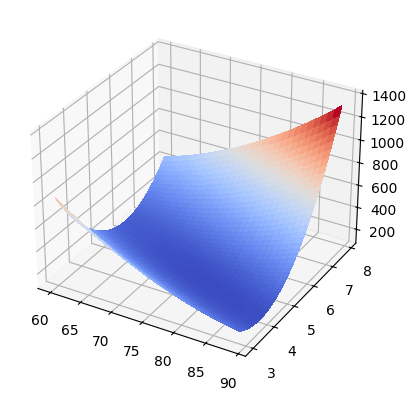

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm
import numpy as np

theta0_range = range(60,90)
theta1_range = np.arange(3,8,0.1)

theta0s, theta1s = np.meshgrid(theta0_range, theta1_range)
costs = J(theta0s,theta1s,X,Y,hyp)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(theta0s, theta1s, costs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(100, 1400)

plt.show()

We can alternatively visualize our cost function as a countour plat. 

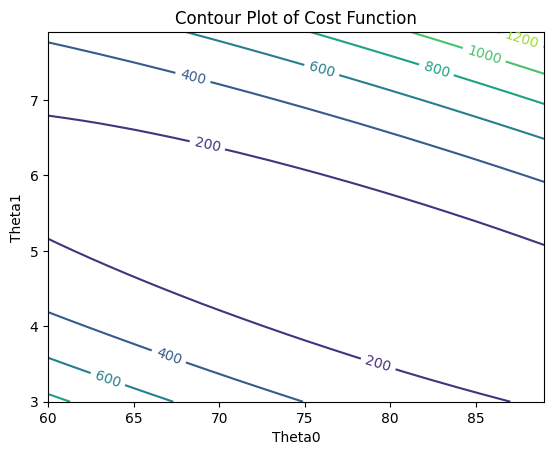

In [20]:
plt.figure()
CS = plt.contour(theta0s, theta1s, costs)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Theta0')
plt.ylabel("Theta1")
plt.title('Contour Plot of Cost Function')
plt.show()

**Key Idea** To find the best fit for our linear equation we want to minimize the cost function to locate

\begin{equation}
min_{\theta_{0},\theta_{1}} J(\theta_{0},\theta_{1})
\end{equation}

We can use gradient descent algorithms and other optimization methods to minimize any continuous function such as J. 

**Intuition**
We start with some random set of values for $\theta_{0}$ and $\theta_{1}$ and vary those values such to decrease the values for these parameters. Rather than randomly perturbing the values for $\theta_{0}$ and $\theta_{1}$, we instead examine the derivatives of the Cost function and select a change in $\theta_{0}$ and $\theta_{1}$ such to minimize the values of these parameters as quickly as possible. 

### Gradient Descent Algorithm

The kernel of the Gradient Descent Algorithm is given by the following iterative function: 

Repeat Until Convergence {
\begin{equation}
\theta_{j} = \theta_{j} - \alpha \frac{\partial J(\theta_{0},\theta_{1})}{\partial \theta_{j}} \;\; for \; j=0:1
\end{equation}
}

where $\alpha$ = learning rate. Large values for $\alpha$ result in big step sizes in the minimization process

In this algorithm it is implied that in each loop we first make an update for $\theta_{0}$ and then $\theta_{1}$. In practice we need to make the updates to both parameters $\theta_{0}$ and $\theta_{1}$ in parallel. To perform simultaneous updates we will introduce temporary variables - more on that later. 

The Gradient Descent Algorithm is dependent on calculating the partial derivative of the Cost Function. In practice this partial derivative is expressed easily. This expression is derived below. 

**Derivation**

\begin{equation}
\frac{\partial}{\partial \theta_{j}}J(\theta_{0},\theta_{1})
\end{equation}

Substituting in the equation for $J(\theta_{0},\theta_{1})$ we get

\begin{equation}
\frac{\partial}{\partial \theta_{j}}   \frac{1}{2m}     \sum_{i=0}^{m} ( (h_{\theta}(x^{(i)}) - y^{(i)})^{2} )
\end{equation}

Substituting the definition $h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x^{i}$ we get:

\begin{equation}
\frac{\partial}{\partial \theta_{j}}   \frac{1}{2m}     \sum_{i=0}^{m} ( (\theta_{0} + \theta_{1}x^{i} - y^{(i)})^{2} )
\end{equation}

We now perform the partial derivations for each of the parameters: 

\begin{equation}
j=0 \; : \; \frac{\partial}{\partial \theta_{0}}J(\theta_{0},\theta_{1}) = \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
j=1 \; : \; \frac{\partial}{\partial \theta_{1}}J(\theta_{0},\theta_{1}) = \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x^{(i)}
\end{equation}

We can then substitute these partial derivative formula back into the definition of gradient descent algorithm:

Repeat Until Convergence {

  > perform simultaneously {
\begin{equation}
\theta_{0} = \theta_{0} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})
\end{equation}

> \begin{equation}
\theta_{1} = \theta_{1} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x^{i}
\end{equation}
  }

}

Based on the above we can provide an implementation of the Gradient Descent algorithm as shown below. 

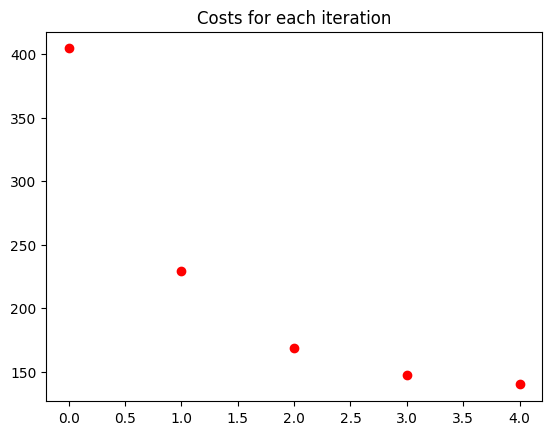

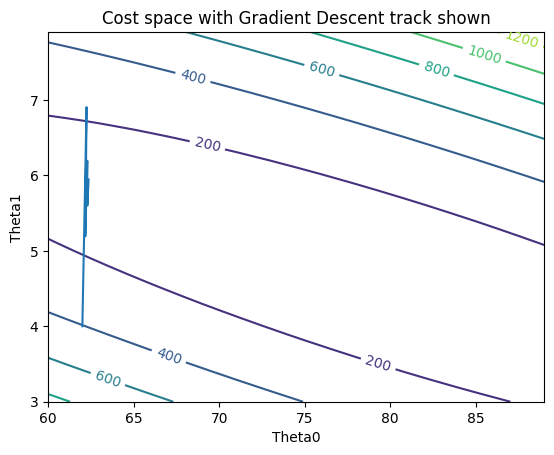

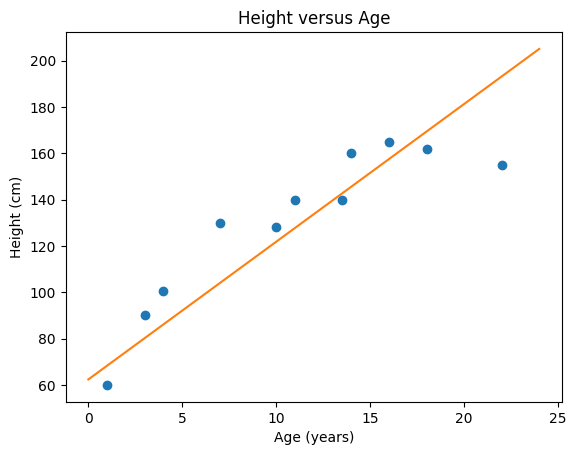

In [21]:
def gd(t0_in,t1_in,min_delta_in,a_in,X_in,Y_in,hyp_in):
    """Implementation of a simple gradient descent algorithm. Inputs are:
        t0_in --- initial guess at parameter t0
        t1_in --- initial guess at parameter t1
        min_delta_in --- a minimum change. If in an iteraction our change is less than this, we are finished. 
        a_in --- learning rate
        X_in --- vector of input values
        Y_in --- vector of output values
        hyp_in --- our hypotheis function
        """
    m = len(X_in)
    c = []
    t0s = []
    t1s = []
    
    t0 = t0_in
    t1 = t1_in
    t0s.append(t0_in)
    t1s.append(t1_in)
    
    # note - there is no do while construct in python. 
    while True:
        # calculate the cost based on the current parameters
        c.append(J(t0,t1,X_in,Y_in,hyp_in))
        
        temp0 = t0
        temp1 = t1
        s = 0
        # iterate over each of the inputs and calculate elements for t_0 update
        for i in range(0,m):
            s+=  (hyp_in(temp0,temp1,X_in[i]) - Y_in[i])
        t0 = temp0 - a_in * (1/m) * s 

        s = 0 
        # iterate over each of the inputs and calculate elements for t_1 update
        for i in range(0,m):
            s+=  (hyp_in(temp0,temp1,X_in[i]) - Y_in[i]) * X_in[i]
        t1 = temp1 - a_in * (1/m) * s 

        t0s.append(t0)
        t1s.append(t1)

        # check if our parameters are still seeing large updates -- if not, break
        if( (abs(temp0 - t0) < min_delta_in) and (abs(temp1 - t1) < min_delta_in) ):
            break
    return t0s, t1s, c

t0s, t1s, c = gd(62,4,0.5,0.01,X,Y,hyp)

plt.plot(c, 'ro')
plt.title('Costs for each iteration')
plt.show()

plt.figure()
CS = plt.contour(theta0s, theta1s, costs)
plt.plot(t0s,t1s)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Cost space with Gradient Descent track shown')
plt.show()

plt.plot(X,Y, "o")
plt.title('Height versus Age')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
x2 = np.array([i for i in range(25)])
y2 = t0s[-1] + t1s[-1]*x2
plt.plot(x2,y2)
plt.show()

## Normalization 

Our result is reasonable but not ideal. We can see that while good progress was made in finding an appropriate value for $\theta_{1}$, very poor progress was made with $\theta_{0}$. This was due to the very small learning rate chosen. However if we had selected a much larger learning rate, than we would have had problems finding a good value for $\theta_{1}$. 

This problem is due to the very different scales used in our data for our two parameters. We can see just how bad the scale problem is if we use similar scales for visualization on both axes. 

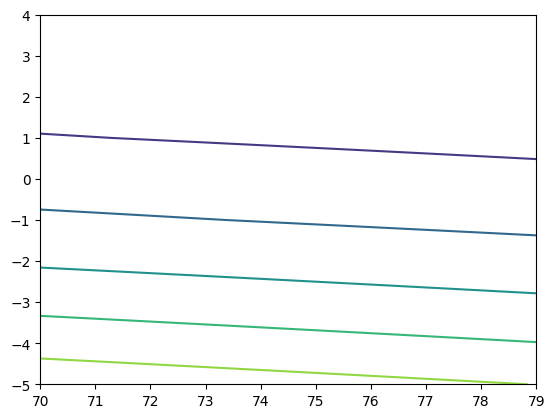

In [22]:
theta0_range = range(70,80)
theta1_range = range(-5,5)

theta0s, theta1s = np.meshgrid(theta0_range, theta1_range)
costs = J(theta0s,theta1s,X,Y,hyp)

plt.figure()
plt.contour(theta0s, theta1s, costs)
plt.show()

To correct for this we need to make sure that each of our input features have a similar scale. This process is referred to as **normalization** and is necessary because the gradient descent algorithms does not possess the property of scale invariance.

Within the Machine Learning community two alternate forms of normalization are often applied: Feature Scaling and Z-Score Normalization. **Feature scaling, also known as min-max scaling**, adjusts the range of the data such that all data $\in [0,1]$. The adjustment is made as follows:

\begin{equation}
x' = \frac{x-min(x)}{max(x) - min(x)}
\end{equation}

**Z-score normalization**, sometimes referred to simply as **standardization** instead expresses individual points of data as being a number of standard deviations away from the mean of the data. The adjustment is made as follows:

\begin{equation}
x' = \frac{x-mean(x)}{std(x)}
\end{equation}

where $mean(x)$ is the arithmetic mean over all items in x and $std(x)$ is the standard deviation of x. 

Feature Scaling is a sensible method to use if either of the following conditions are true:
 * The original data has features with fixed maximum and minimum in the original feature space. For example a set of sensors might produce values fixed in the range 0..255. 
 * The algorithm which we will be subsequently using requires our data to be in the range 0...1. For example some activation functions in Neural Networks as we will see later need data to be in this specific range. 
 
However in general z-score standardization tends to be a more favored method of normalization within machine learning. There are a number of reasons for this, but the most important of these is that z-score normalization naturally copes even when a new test data example was out of the original range of the training data that was used to train the algorithm. Since z-score normalization has no fixed maximum or minimum we can in practice use new data with features that are out of range of our original data set. 

In practice though the choice of normalization algorithm is recognized to be very much application dependent. In the following examples we make use of z-score normalization. 

#### Scaling and the Target 

In the example above and for illustration purposes we scaled our target variable and searched for the best fit for $\theta_{0}$ as well as $\theta_{1}$. In turns out that in practice we do not need to search for $\theta_{0}$. 

Instead we can set $\theta_{0}$ based on the average at 0 for the other scaled features. $\theta_{0}$ is thus truly a constant and this is why we will not usually see p-value information regarding $\theta_{0}$. 

From here on out this is the approach we will take to setting $\theta_{0}$. 

#### Example: Z-Score Normalization 

Y intercept is at 130.04545454545453


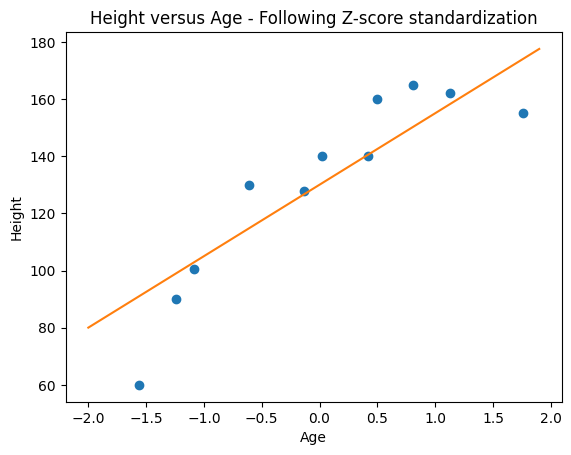

In [23]:
X_new = (X-np.mean(X))/np.std(X)

plt.plot(X_new,Y, "o")
plt.title('Height versus Age - Following Z-score standardization')
plt.xlabel('Age')
plt.ylabel('Height')

t0 = np.mean(Y)
print("Y intercept is at " + str(t0))

x2 = np.arange(-2,2,0.1)

# lets use the calculated value for t0 but guess the value for t1
y2 = t0 + 25*x2 
plt.plot(x2,y2)
plt.show()

We can now re-structure the above to use Gradient Descret to search only for $\theta_{1}$.  

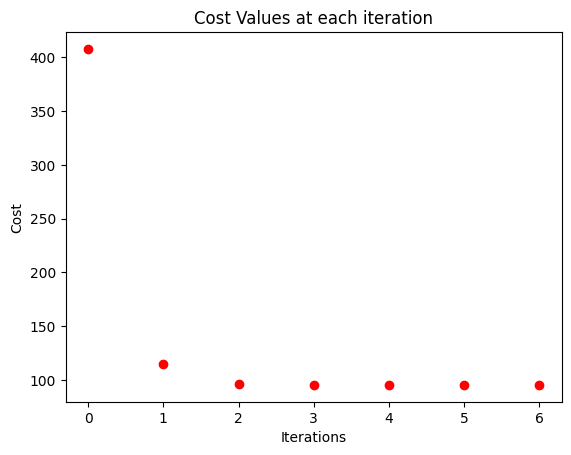

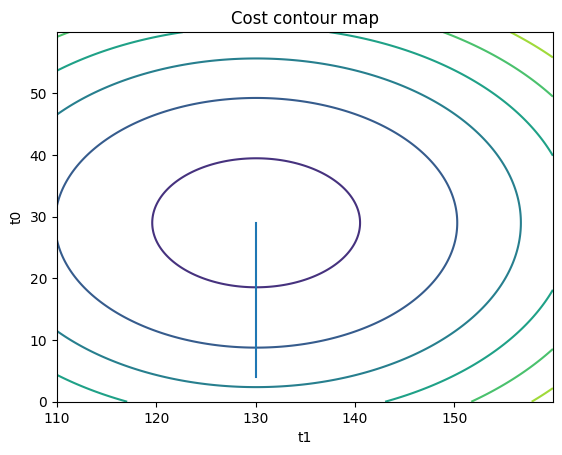

28.99747992534312


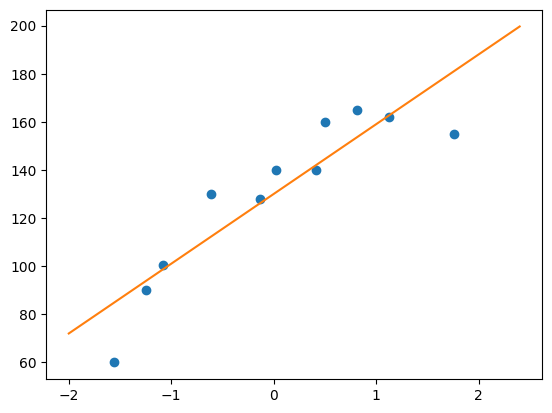

In [24]:
def gd1(t0_in,t1_in,min_delta_in,a_in,X_in,Y_in,hyp_in):
    m = len(X_in)
    c = []
    t1s = []
    
    t1 = t1_in
    t1s.append(t1_in)
    
    # note - there is no do while construct in python. 
    while True:
        c.append(J(t0_in,t1,X_in,Y_in,hyp_in))
        
        temp1 = t1

        s = 0 
        for i in range(0,m):
            s+=  (hyp_in(t0_in,temp1,X_in[i]) - Y_in[i]) * X_in[i]
        t1 = temp1 - a_in * (1/m) * s 

        t1s.append(t1)
        
        if(abs(temp1 - t1) < min_delta_in):
            break
    return t1s, c

md = 0.01
a2 = 0.75
t1s, c = gd1(t0,4,md,a2,X_new,Y,hyp)

plt.plot(c, 'ro')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Cost Values at each iteration")
plt.show()

plt.figure()

theta0_range = np.arange(110,160,0.1)
theta1_range = np.arange(0,60,0.1)
theta0s_new, theta1s_new = np.meshgrid(theta0_range, theta1_range)

costs_new = J(theta0s_new,theta1s_new,X_new,Y,hyp)

CS = plt.contour(theta0s_new, theta1s_new, costs_new)
plt.plot([t0]*len(t1s),t1s)
plt.title("Cost contour map")
plt.xlabel('t1')
plt.ylabel('t0')
plt.show()

x2 = np.arange(-2,2.5,0.1)
t1 = t1s[-1]
print(t1)
y2 = t0 + t1*x2 
plt.plot(X_new,Y, "o")
plt.plot(x2,y2)
plt.show()

Note that we don't try to convert our thetas in the new feature space back to the original feature space. Instead when we have new test data to calculate on we transform the test input features into the new data space. 

For example given a new value for an individuals age $x_{i} = 20$ we can predict the height of the person as follows:

In [25]:
x1 = 20
# transform the feature into the normalized feature space
x1_prime = (x1-np.mean(X))/np.std(X)

# we can the calculate the estimated value of y as follows
y1 = t0 + t1*x1_prime

print(y1)

171.93264254506227


## Multivariate Regression
So far our explanations and examples have centered around a simple case with only one feature. Linear Regression straightforwardly scales up to deal with multiple features. 

### Multivariate Hypothesis Function 
Our hypothesis function must be extended to handle multiple features. We can extend the basic form of the function as follows:

\begin{equation}
h_{\theta}(x) = \theta_{0} + \theta_{1}x_{i} + \theta_{2}x_{2} + \dots + \theta_{n}x_{n}
\end{equation}

where we have n different features. 

We can simplify this function as follows:

\begin{equation}
h_{\theta}(x) = \theta_{0} + \sum_{i=1}^{n} \theta_{i}x_{i}
\end{equation}

One limitation with this equation is that we still have $\theta_{0}$ handled in a separate way to all true features. It is convenient if we note that generally:

\begin{equation}
\theta \times 1 = \theta
\end{equation}

Thus we can instead write our hypothesis function as:

\begin{equation}
h_{\theta}(x) = \theta_{0} 1 + \sum_{i=1}^{n} \theta_{i}x_{i}
\end{equation}

Or if we introduce a variable $x_{0}$ and set it to 1, then:

\begin{equation}
h_{\theta}(x) = \theta_{0}x_{0} + \sum_{i=1}^{n} \theta_{i}x_{i}
\end{equation}

Which of course is just: 

\begin{equation}
h_{\theta}(x) = \sum_{i=0}^{n} \theta_{i}x_{i}
\end{equation}

where $x_{0} = 1$ and all other x's correspond to our features. Note that this calculation looks like the scalar product of two vectors. 

### Vectorized Multivariate Hypothesis Function 
The above approach is particularly useful as it allows us to recast our calculations in a vectorized notation. Generally:

\begin{equation}
h_{\theta}(x) = \theta^{T}x
\end{equation}

This vectorized approach takes advantage of the fact that our hypothesis function is a summation of products of input features and parameters. To illustrate we can begin with our basic case of the single feature function defined above along with one data point for that function based on values we recently defined. 

In [26]:
# let's define our two parameters into a single vector
theta = np.array([t0,t1])
# now lets define our input date. Remember that we need to create a dummy value for x_{0} 
# which we set equal 1. 
x = np.array([1,x1_prime])
# now multiply the matrices together
result = np.matmul(theta.T,x)
print(result)

171.93264254506227


#### Parallelism through Vectorization 
This vectorized approach is useful not only because of the simple notation, but it allows us to easily write out and make calculations for multiple sets of parameters in a single computational step. To illustrate this, we can extend the case above to handle multiple data points by substituting the matrix multiplication operator for the simple inner product operator. 

In [27]:
# define the raw input data pints (different values for age)
ages = np.array([12.5,17.5,20,21,25])
# normalize these based on previously established paramters
ages = (ages-np.mean(X))/np.std(X)
# construct the data matrix x that includes dummy values for x_{0} as well as the real 
# age values for x_{1}
x = np.matrix([[1,1,1,1,1],ages])
# now we can matrix multiply  
results = np.matmul(theta.T,x)
print(results)

[[137.54763747 160.47097419 171.93264255 176.51730989 194.85597926]]


Furthermore we can extend the approach to allow us to calculate the resultant values for each data point for multiple different sets of hypotheses. This can be useful if we ever want to test multiple sets of parameters in parallel. 

In [28]:
# construct the matrix of paraeters where each row is a single set of parameters i.e., theta
thetas = np.matrix([[t0,t1],[120,30]])
results = np.matmul(thetas,x)
print(results)

[[137.54763747 160.47097419 171.93264255 176.51730989 194.85597926]
 [127.76155336 151.47741085 163.3353396  168.07851109 187.05119709]]


### Multivariate Cost Function
By introducing $x_{0}=1$ we can straightforwardly rework our cost function to treat all parameters equally. The generalized form of our Cost Function becomes:

\begin{equation}
J(\theta) = \frac{1}{2m}     \sum_{i=0}^{m} ( h_{\theta}(x^{(i)}) - y^{(i)})^{2} 
\end{equation}

or in code: 

In [29]:
def J(theta,x,y): 
    sse = 0
    m = len(x)
    for i in range(0,m):
        h = np.matmul(theta,x[i,:].T) 
        error = h - y[i]
        sqerror = error**2
        sse+= sqerror
    return sse / (2*m)

While the general form of our gradient descent algorithm becomes: 

Repeat Until Convergence {

  > perform simultaneously {

> \begin{equation}
\theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum_{i=0}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}).x_{j}^{i}
\end{equation}
  }

}

We can rewrite our gradient descent implementation to work with this generic design. The inputs to our algorithm are now:
 * theta_in - a vector of initial parameterizations
 * min_delta - the minimum change in delta permissible before gradient descent stops
 * a_in - the learning rate
 * X_in - a matrix of input feature vectors
 * Y_in - a vector of target variables of length m 
 
Our function returns
 * thetas - a matrix of vectors where each vector is a set of parameters at a particular epoch 
 
Note that in this simplified form we have:
 * removed the input parameter hyp_in since we now assume the hypothesis function is always of the form $\theta^{T}x$
 * stopped calculating the cost for each iteration. Instead this can be calculated afterward for visualization if needed 

In [30]:
def gd(theta_in,min_delta_in,a_in,X_in,Y_in):
    m = len(Y_in) # number of training examples
    _ , n = np.shape(X_in) # number of features
    
    theta = theta_in
    thetas = np.array(theta_in,ndmin=2)

    while True:
        temp = np.copy(theta)
        for j in range(0,n):
            # making calculations for jth parameter 
            s = 0 
            for i in range(0,m):
                s+=  (np.matmul(temp.T,np.ravel(X_in[i,:])) - Y_in[i])  * X_in[i,j]
            theta[j] = temp[j] - a_in * (1/m) * s 
        thetas = np.vstack((thetas,theta))
        
        progressing = False
        for j in range(0,n):
            if(abs(temp[j] - theta[j]) > min_delta_in):
                progressing = progressing | True
        if not progressing: break 
    return thetas

To demonstrate this new implementation we can firstly test it against our original single feature height and age example as follows:

In [31]:
# define initial values for theta
theta = np.array([t0,10])
# set min_delta and the learning rate (a) 
md = 0.01
a = 0.75
# define the new matrix X based around our normalized vector for X previously obtained 
x_0 = [1]*len(X_new)
X = np.matrix([x_0,X_new]).T

thetas = gd(theta,md,a,X,Y)
print("Theta0 and Theta1")
print(thetas[-1:])

Theta0 and Theta1
[[130.04545455  28.99784614]]


We note that since we initialized $\theta_{0}$ to the calculated value obtained when we normalized our input feature, that the value of $\theta_{0}$ never changed. We also note that the final value for $\theta_{1}$ is almost identical to the calculation we made for it earlier. 

### A Simple Multivariate Example 

We can try a proper, though simple, multivariate case by defining a new multivariate data set. For this example we will look at the relationship between a target variable Growth and two input features Average Temperature and Average Rainfall. 

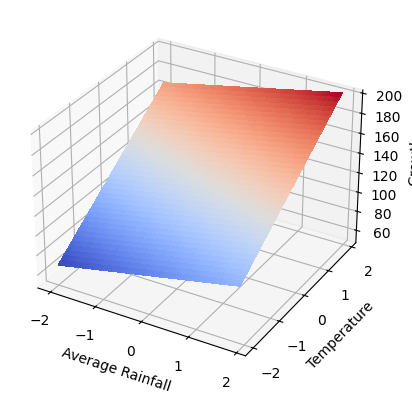

In [33]:
# define our new data 
Y = np.array([100,110,120,120,148,130,170,140,195]) 
X = np.array([[22,107],[28,110],[35,100],[21,201],[29,210],[33,201],[22,330],[25,330],[33,340]])

# Redefine our standardization operation to work over 2D arrays
def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

# standardize our input features
X, means, stds = standardize(X)

# define initial values for theta
rows, cols = X.shape
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and learning rate (a)
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained 
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X))

# Run gradient descent 
thetas = gd(theta,md,a,X,Y)

# plot a surface based on the returned function parameters

# initialize values for features x1 and x2
x_range = np.arange(-2,2,0.1) 

x1s, x2s = np.meshgrid(x_range, x_range) # remember - plt.surface likes this meshgrid output
mesh_rows, mesh_cols = x1s.shape

# construct 1D arrays for x1, x2 and x0
x1 = np.ravel(x1s)
x2 = np.ravel(x2s)
x0 = np.array([1]*len(x2))

# merge 1D arrays into a single x array for calculations \n",
x = np.matrix([x0,x1,x2])

# perform calculations \n",
z = np.matmul(thetas[-1,:],x)

# reshape result to have the same organization as result of meshgrid \n",
zs = np.reshape(z,(mesh_rows,mesh_cols))

# plot the surface along with our training data points 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x1s, x2s, zs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.scatter(X[:,2], X[:,1], Y, c='r', marker='o') 
ax.set_xlabel('Average Rainfall')
ax.set_ylabel('Temperature')
ax.set_zlabel('Growth')
ax.set_zlim(50, 200)
plt.show()

## Non-Linear Linear Regression
In our vectorized calculations above we are assuming that our hypothesis function is always of the form:

\begin{equation}
h_{\theta}(x) = \sum_{i=0}^{n} \theta_{i}x_{i}
\end{equation}

However, if we remember back to our early investigations of the Age v Height example we noted that a more complex hypothesis function of the form 

\begin{equation}
Y = 50 + 15X - 0.68 X^{2} + 0.011 X^{3}
\end{equation}

seemed to give us a better fit. 

We can directly calculate such cases by pre-computing the additional features $X^{2}$ and $X^{3}$ based on our original features. Redefining our Age and Height example to work with the new gradient descent algorithm we get:

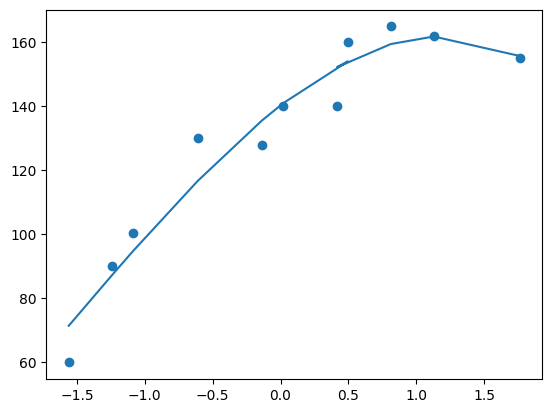

Parameters obtained for this normalized data
[130.04545455  49.99775512   1.83563491 -25.67787883]


In [34]:
Y = np.array([60,90,100.5,130,128,140,160,140,165,162,155])
x1 = np.array([1,3,4,7,10,11,14,13.5,16,18,22])
x2 = x1**2
x3 = x1**3
X = np.vstack((x1,x2,x3)).T

# standardize our input features
X, means, stds = standardize(X)

# define initial values for theta
rows, cols = X.shape
theta = np.ones(1+cols)*1
theta[0] = np.mean(Y) # remember - we directly calculate t0

# set min_delta and a 
md = 0.01
a = 0.05

# define the new matrix X based around our standardized vector for X previously obtained 
x_0 = np.array([1]*rows)
X = np.hstack((x_0[:, np.newaxis],X))

# Run gradient descent 
thetas = gd(theta,md,a,X,Y)

# Generate data for visualizing our optimized function 
x1s = X[:,1]
x2s = X[:,2]
x3s = X[:,3]
x0s = np.ones(len(x1s))
xs = np.vstack((x0s,x1s,x2s,x3s)).T

# calculate y values based on this generated data and results of optimization
ys = np.matmul(thetas[-1,:],xs.T)

# plot training points and function over generated data 
plt.scatter(X[:,1],Y)
plt.plot(x1s,ys)
plt.show()

print('Parameters obtained for this normalized data')
print(thetas[-1,:])

# Assignments and Questions

The assignments below should help you to play around and 'break' the examples above. 

1. Create your own examples using max daily temperature versus day of year. 
2. Run your data through modelling and visualisation. 
3. Make some predictions and compare your predictions to what you might expect according to your data points. 

If you can do all of that, create yourself a multivariate example based on Squirrel Weight as a function of day of year and age! If you don't like that one, think of something that you think would be a more interesting multivariate regression topic that you can code up quickly. 

By the end of week 2, you should be able to load up notebooks onto Colab or your own chosen notebook server, plus you should have a good python install available on your machine which you can use with venv and pip to install tensorflow. 
 